In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cc_record_df=pd.read_csv("credit_record.csv")
cc_record_df.head(6)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C


In [140]:
cc_record_df.shape

(1048575, 3)

In [141]:
cc_record_df['STATUS'].replace(['C', 'X'],0,inplace=True)#if 0 : approved
cc_record_df['STATUS'].replace(['1','2','3','4','5'],1,inplace=True)#if 1: not approved
cc_record_df['STATUS'] = cc_record_df['STATUS'].astype('int')

In [142]:
cc_record_actual_df = cc_record_df.groupby('ID').agg(max).reset_index()#We take the actual month
cc_record_actual_df.drop('MONTHS_BALANCE',axis=1, inplace=True)#because everything is 0

In [143]:
cc_record_actual_df['STATUS'].value_counts()

STATUS
0    40635
1     5350
Name: count, dtype: int64

In [144]:
app_record_df = pd.read_csv("application_record.csv")
app_record_df.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [145]:
app_record_df.shape

(438557, 18)

In [146]:
app_record_df.isnull().sum()#see what can we remove

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [147]:
app_record_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)#too much null value

In [148]:
#we put all the binary non numerical value into binary numerical value 
app_record_df['CODE_GENDER'] = app_record_df['CODE_GENDER'].map({'M': 0, 'F': 1})
app_record_df['FLAG_OWN_REALTY'] = app_record_df['FLAG_OWN_REALTY'].map({'Y': 0, 'N': 1})
app_record_df['FLAG_OWN_CAR'] = app_record_df['FLAG_OWN_CAR'].map({'Y': 0, 'N': 1})

In [149]:
fusion1_df = pd.merge(app_record_df,cc_record_actual_df, on='ID', how='inner')#We put together the 2 dataset
fusion1_df.drop_duplicates(inplace=True)#We check if there is no duplicate left
fusion1_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,1
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,1
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,0


In [150]:
app_record_df['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    438557
Name: count, dtype: int64

In [151]:
#There is only one value so this column is not usefull
app_record_df.drop('FLAG_MOBIL', axis=1,inplace=True)

In [152]:
app_record_df['FLAG_WORK_PHONE'].value_counts()

FLAG_WORK_PHONE
0    348156
1     90401
Name: count, dtype: int64

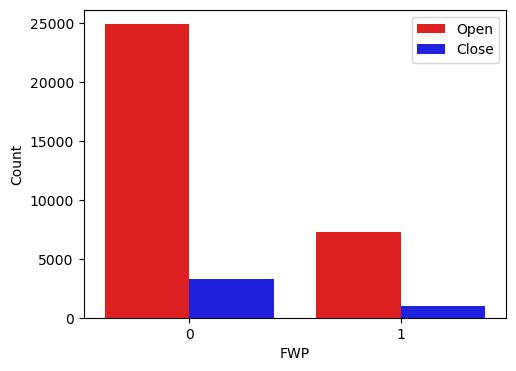

In [153]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='FLAG_WORK_PHONE', hue='STATUS', data=fusion1_df, palette={0: "red", 1: "blue"})
plt.legend(['Open', 'Close'])
plt.xlabel("FWP")
plt.ylabel("Count")
plt.show()

In [154]:
#this column don't help, it is not corelate to status so we can revome it
app_record_df.drop('FLAG_WORK_PHONE', axis=1,inplace=True)

In [155]:
app_record_df['FLAG_PHONE'].value_counts()

FLAG_PHONE
0    312353
1    126204
Name: count, dtype: int64

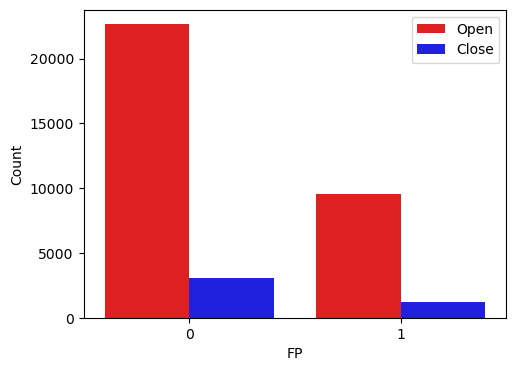

In [156]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='FLAG_PHONE', hue='STATUS', data=fusion1_df, palette={0: "red", 1: "blue"})
plt.legend(['Open', 'Close'])
plt.xlabel("FP")
plt.ylabel("Count")
plt.show()

In [157]:
#this column don't help, it is not corelate to status so we can revome it
app_record_df.drop('FLAG_PHONE', axis=1,inplace=True)

In [158]:
app_record_df['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    391102
1     47455
Name: count, dtype: int64

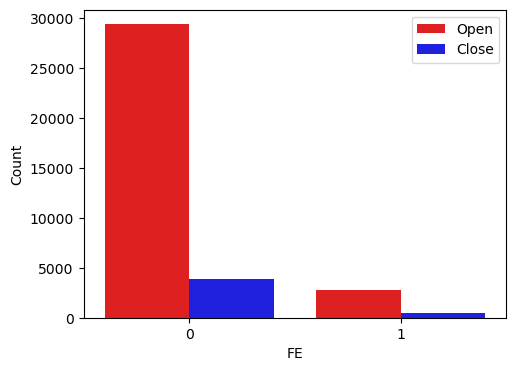

In [159]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='FLAG_EMAIL', hue='STATUS', data=fusion1_df, palette={0: "red", 1: "blue"})
plt.legend(['Open', 'Close'])
plt.xlabel("FE")
plt.ylabel("Count")
plt.show()

In [160]:
#this column don't help so we can revome it
app_record_df.drop('FLAG_EMAIL',axis=1, inplace=True)

In [161]:
app_record_df.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,2.0
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,2.0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0
5,5008810,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1.0


In [162]:
app_record_df['CNT_CHILDREN'].value_counts()#if it was only 0 value, we could drop the column

CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64

In [163]:
app_record_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)#in the csv file all the 0 value are equal to 365243 so we replace them cause it's going to distord the data
app_record_df['DAYS_EMPLOYED'] = app_record_df['DAYS_EMPLOYED'].abs()#Also all the negative are supposed to be positive
app_record_df['DAYS_BIRTH'] = app_record_df['DAYS_BIRTH'].abs()

In [164]:
app_record_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,2.0
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,2.0
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,2.0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0
5,5008810,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0
6,5008811,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0
7,5008812,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0
8,5008813,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0
9,5008814,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0


In [165]:
fusion_df = pd.merge(app_record_df,cc_record_actual_df, on='ID', how='inner')#We put together the 2 dataset

In [166]:
fusion_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,2.0,1
1,5008805,0,0,0,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,2.0,1
2,5008806,0,0,0,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,2.0,0
3,5008808,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0,0
4,5008809,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0,0
5,5008810,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0,0
6,5008811,1,1,0,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1.0,0
7,5008812,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0,0
8,5008813,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0,0
9,5008814,1,1,0,0,283500.0,Pensioner,Higher education,Separated,House / apartment,22464,0,1.0,0


In [167]:
fusion_df.drop_duplicates(inplace=True)#We check if there is no duplicate left

In [168]:
#We transform all the non numerical value into numerical value
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ["NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
final_fusion_df = fusion_df.copy()
label_encoder = LabelEncoder()
for column in columns_to_encode:
    final_fusion_df[column] = label_encoder.fit_transform(final_fusion_df[column])

In [169]:
final_fusion_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,0,0,0,0,427500.0,4,1,0,4,12005,4542,2.0,1
1,5008805,0,0,0,0,427500.0,4,1,0,4,12005,4542,2.0,1
2,5008806,0,0,0,0,112500.0,4,4,1,1,21474,1134,2.0,0
3,5008808,1,1,0,0,270000.0,0,4,3,1,19110,3051,1.0,0
4,5008809,1,1,0,0,270000.0,0,4,3,1,19110,3051,1.0,0
5,5008810,1,1,0,0,270000.0,0,4,3,1,19110,3051,1.0,0
6,5008811,1,1,0,0,270000.0,0,4,3,1,19110,3051,1.0,0
7,5008812,1,1,0,0,283500.0,1,1,2,1,22464,0,1.0,0
8,5008813,1,1,0,0,283500.0,1,1,2,1,22464,0,1.0,0
9,5008814,1,1,0,0,283500.0,1,1,2,1,22464,0,1.0,0


In [170]:
#Split the data into train-test or train-val-test
from sklearn.model_selection import train_test_split
parametre=['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'CNT_FAM_MEMBERS']
 
X = final_fusion_df[parametre]
y=final_fusion_df['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [171]:
#We check the accuracy of the model

In [172]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8615834704699213

In [173]:
#Now we try to obtimize the hyper-parameter, by testing different value of each and see wich one has the best accuracy

In [174]:
#n_estimators

Progression:  20%|██████████████▏                                                        | 1/5 [01:34<06:18, 94.50s/it]

100 a pour valeur : [0.8611263485097824, 0.8614006216858658, 0.8610349241177546, 0.8612177729018102, 0.861309197293838, 0.8612177729018102, 0.8611263485097824, 0.8614006216858658, 0.8614920460778935, 0.8611263485097824]


Progression:  40%|████████████████████████████                                          | 2/5 [04:50<07:42, 154.22s/it]

200 a pour valeur : [0.8610349241177546, 0.8611263485097824, 0.8612177729018102, 0.8609434997257268, 0.8614006216858658, 0.861309197293838, 0.8614006216858658, 0.861309197293838, 0.861309197293838, 0.8614920460778935]


Progression:  60%|██████████████████████████████████████████                            | 3/5 [09:29<07:02, 211.10s/it]

300 a pour valeur : [0.8612177729018102, 0.861309197293838, 0.861309197293838, 0.8614920460778935, 0.8612177729018102, 0.861309197293838, 0.8611263485097824, 0.8614006216858658, 0.8611263485097824, 0.8612177729018102]


Progression:  80%|████████████████████████████████████████████████████████              | 4/5 [15:42<04:34, 274.90s/it]

400 a pour valeur : [0.8612177729018102, 0.8611263485097824, 0.8611263485097824, 0.8610349241177546, 0.8612177729018102, 0.8611263485097824, 0.8612177729018102, 0.861309197293838, 0.8612177729018102, 0.861309197293838]


Progression: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [23:26<00:00, 281.36s/it]

500 a pour valeur : [0.8612177729018102, 0.8610349241177546, 0.861309197293838, 0.861309197293838, 0.861309197293838, 0.8611263485097824, 0.8612177729018102, 0.8610349241177546, 0.8611263485097824, 0.8612177729018102]


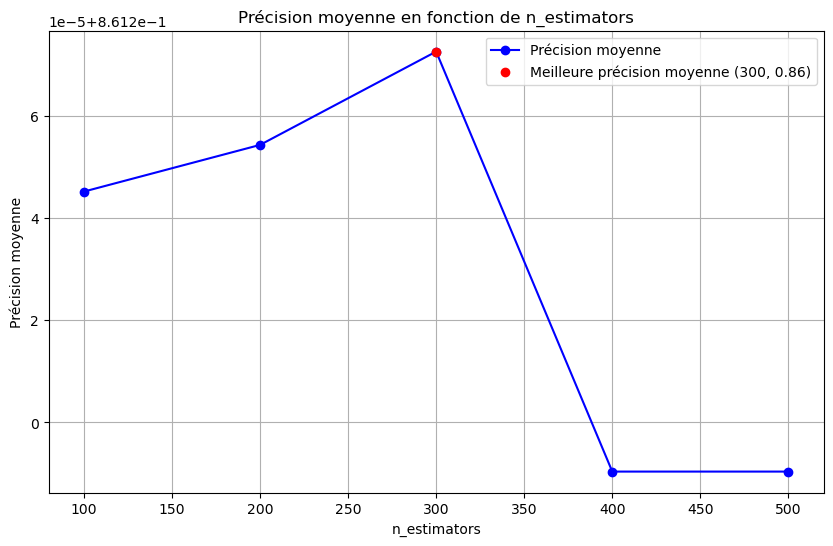

In [175]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

n_estimators_values = range(100, 501,100)
mean_accuracies = []

for n_estimators_value in tqdm(n_estimators_values, desc="Progression"):
    accuracies = [] 
    
    for _ in range(10):  
        model = RandomForestClassifier(n_estimators=n_estimators_value)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"{n_estimators_value} a pour valeur : {accuracies}")
best_n_estimators = n_estimators_values[np.argmax(mean_accuracies)]
best_mean_accuracy = max(mean_accuracies)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_accuracies, marker='o', linestyle='-', color='b', label='Précision moyenne')
plt.scatter(best_n_estimators, best_mean_accuracy, color='r', label=f"Meilleure précision moyenne ({best_n_estimators}, {best_mean_accuracy:.2f})", zorder=5)
plt.title('Précision moyenne en fonction de n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Précision moyenne')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
#max_depth

Progression:  20%|██████████████▏                                                        | 1/5 [01:38<06:34, 98.55s/it]

15 a pour valeur : 0.8847686962881698


Progression:  40%|████████████████████████████▍                                          | 2/5 [03:17<04:56, 98.72s/it]

16 a pour valeur : 0.8849881148290365


Progression:  60%|██████████████████████████████████████████                            | 3/5 [05:01<03:22, 101.02s/it]

17 a pour valeur : 0.8843298592064363


Progression:  80%|████████████████████████████████████████████████████████              | 4/5 [06:50<01:44, 104.49s/it]

18 a pour valeur : 0.883927591881514


Progression: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [08:44<00:00, 104.83s/it]

19 a pour valeur : 0.8824099469738526


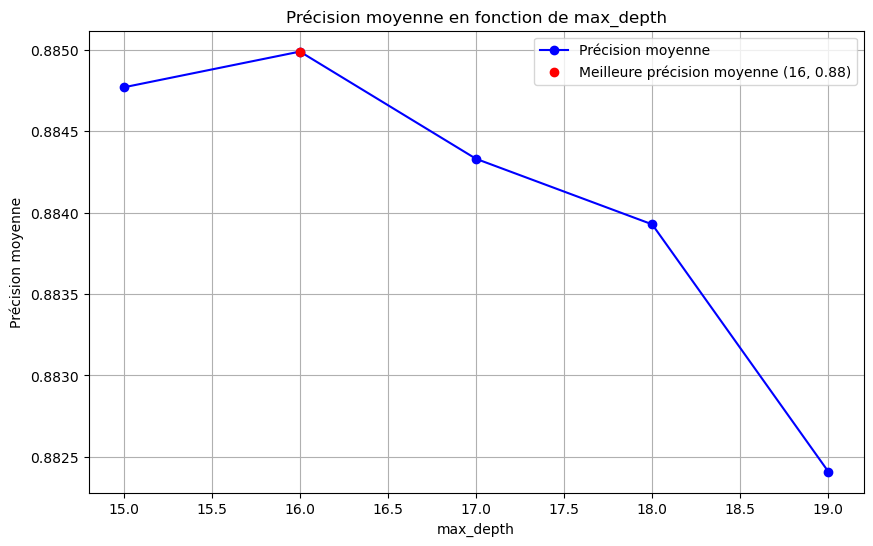

In [176]:
max_depth_values = range(15, 20)
mean_accuracies = []

for max_depth_value in tqdm(max_depth_values, desc="Progression"):
    accuracies = [] 
    
    for _ in range(5): 
        model = RandomForestClassifier(n_estimators=300, max_depth=max_depth_value)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)
    print(f"{max_depth_value} a pour valeur : {mean_accuracy}")
best_max_depth = max_depth_values[np.argmax(mean_accuracies)]
best_mean_accuracy = max(mean_accuracies)

# Affichez le graphique
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracies, marker='o', linestyle='-', color='b', label='Précision moyenne')
plt.scatter(best_max_depth, best_mean_accuracy, color='r', label=f"Meilleure précision moyenne ({best_max_depth}, {best_mean_accuracy:.2f})", zorder=5)
plt.title('Précision moyenne en fonction de max_depth')
plt.xlabel('max_depth')
plt.ylabel('Précision moyenne')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# min sample leaf

Progression: 100%|█████████████████████████████████████████████████████████████████████| 15/15 [23:02<00:00, 92.16s/it]


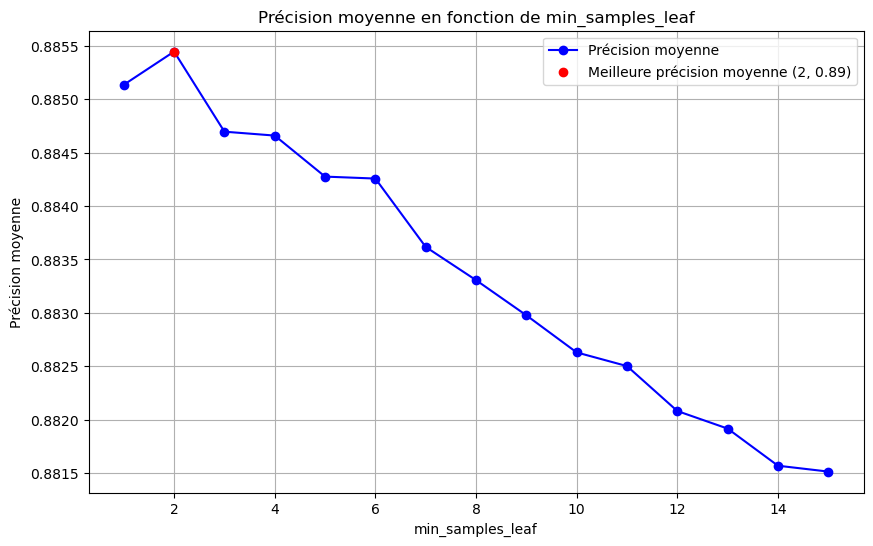

In [177]:

min_samples_leaf = range(1, 16)
mean_accuracies = []

for min_samples_leaf_value in tqdm(min_samples_leaf, desc="Progression"):
    accuracies = [] 
    
    for _ in range(5): 
        model = RandomForestClassifier(n_estimators=300, max_depth=16, min_samples_leaf=min_samples_leaf_value)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
    
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

best_min_samples_leaf = min_samples_leaf[np.argmax(mean_accuracies)]
best_mean_accuracy = max(mean_accuracies)

# Affichez le graphique
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf, mean_accuracies, marker='o', linestyle='-', color='b', label='Précision moyenne')
plt.scatter(best_min_samples_leaf, best_mean_accuracy, color='r', label=f"Meilleure précision moyenne ({best_min_samples_leaf}, {best_mean_accuracy:.2f})", zorder=5)
plt.title('Précision moyenne en fonction de min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Précision moyenne')
plt.legend()
plt.grid(True)
plt.show()

In [178]:
#the most obtimize score model
model = RandomForestClassifier(n_estimators=300, max_depth=16, min_samples_leaf=2)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8848052660449808

In [179]:
#Then we watch the evaluation of the result

Confusion Matrix:
 [[9581   61]
 [1199   97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9642
           1       0.61      0.07      0.13      1296

    accuracy                           0.88     10938
   macro avg       0.75      0.53      0.54     10938
weighted avg       0.86      0.88      0.84     10938



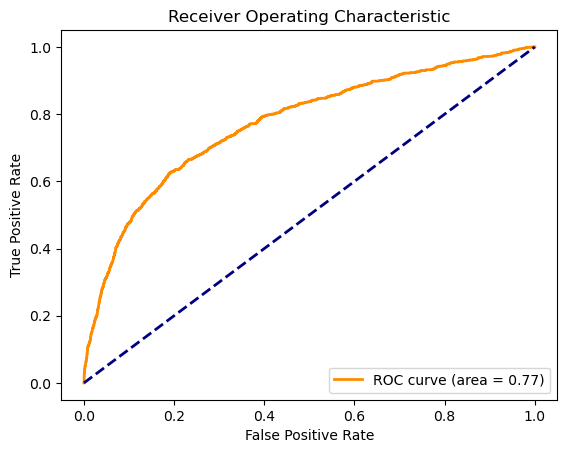

In [180]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC et AUC
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [181]:
import joblib
joblib.dump(model, 'Bank.pkl')

['Bank.pkl']